In [1]:
from study_da.postprocess import aggregate_output_data
from study_da.plot import plot_heatmap, get_title_from_configuration

In [2]:
df_final = aggregate_output_data(
    "example_tune_scan/tree.yaml",
    l_group_by_parameters=["qx_b1", "qy_b1", "i_oct_b1", "i_oct_b2"],
    generation_of_interest=2,
    name_output="output_particles.parquet",    
    write_output=True,
    only_keep_lost_particles=True,
)

In [3]:
df_final

weight _rng_s4  chi pdg_id parent_particle_id  \
qx_b1 qy_b1  i_oct_b1 i_oct_b2                                                 
62.31 60.311 -60.0    -60.0       1.0       0  1.0      0                 57   
      60.312 -60.0    -60.0       1.0       0  1.0      0                 38   
      60.313 -60.0    -60.0       1.0       0  1.0      0                 65   
      60.314 -60.0    -60.0       1.0       0  1.0      0                 36   
      60.315 -60.0    -60.0       1.0       0  1.0      0                 56   
...                               ...     ...  ...    ...                ...   
62.32 60.312 -60.0    -60.0       1.0       0  1.0      0                105   
      60.314 -60.0    -60.0       1.0       0  1.0      0                219   
      60.315 -60.0    -60.0       1.0       0  1.0      0                216   
      60.316 -60.0    -60.0       1.0       0  1.0      0                246   
      60.317 -60.0    -60.0       1.0       0  1.0      0                247   

                                       y state charge_ratio             s  \
qx_b1 qy_b1  i_oct_b1 i_oct_b2                                              
62.31 60.311 -60.0    -60.0     -2.44288    -1          1.0       25.8782   
      60.312 -60.0    -60.0    -1.852767    -1          1.0    969.412235   
      60.313 -60.0    -60.0    -2.542203    -1          1.0    915.963719   
      60.314 -60.0    -60.0     -1.62684    -1          1.0    969.625568   
      60.315 -60.0    -60.0    -2.033757    -1          1.0    1153.83004   
...                                  ...   ...          ...           ...   
62.32 60.312 -60.0    -60.0    -1.333328    -1          1.0   1329.835093   
      60.314 -60.0    -60.0    -1.428123    -1          1.0   1392.816943   
      60.315 -60.0    -60.0    -1.199049    -1          1.0   1543.629157   
      60.316 -60.0    -60.0    -1.061429    -1          1.0  22125.827635   
      60.317 -60.0    -60.0    -0.622779    -1          1.0   3913.409087   

                                       mass0  ...  \
qx_b1 qy_b1  i_oct_b1 i_oct_b2                ...   
62.31 60.311 -60.0    -60.0     938272088.16  ...   
      60.312 -60.0    -60.0     938272088.16  ...   
      60.313 -60.0    -60.0     938272088.16  ...   
      60.314 -60.0    -60.0     938272088.16  ...   
      60.315 -60.0    -60.0     938272088.16  ...   
...                                      ...  ...   
62.32 60.312 -60.0    -60.0     938272088.16  ...   
      60.314 -60.0    -60.0     938272088.16  ...   
      60.315 -60.0    -60.0     938272088.16  ...   
      60.316 -60.0    -60.0     938272088.16  ...   
      60.317 -60.0    -60.0     938272088.16  ...   

                               Pile-up_ip1_without_beam_beam  \
qx_b1 qy_b1  i_oct_b1 i_oct_b2                                 
62.31 60.311 -60.0    -60.0                       187.479027   
      60.312 -60.0    -60.0                         166.6675   
      60.313 -60.0    -60.0                       162.324417   
      60.314 -60.0    -60.0                       161.338798   
      60.315 -60.0    -60.0                       160.861357   
...                                                      ...   
62.32 60.312 -60.0    -60.0                       160.340069   
      60.314 -60.0    -60.0                        160.60702   
      60.315 -60.0    -60.0                       160.863804   
      60.316 -60.0    -60.0                       161.341279   
      60.317 -60.0    -60.0                       162.324756   

                               Pile-up_ip1_with_beam_beam  \
qx_b1 qy_b1  i_oct_b1 i_oct_b2                              
62.31 60.311 -60.0    -60.0                    236.580245   
      60.312 -60.0    -60.0                    203.890777   
      60.313 -60.0    -60.0                      183.2206   
      60.314 -60.0    -60.0                    175.436457   
      60.315 -60.0    -60.0                     170.92686   
...                                   

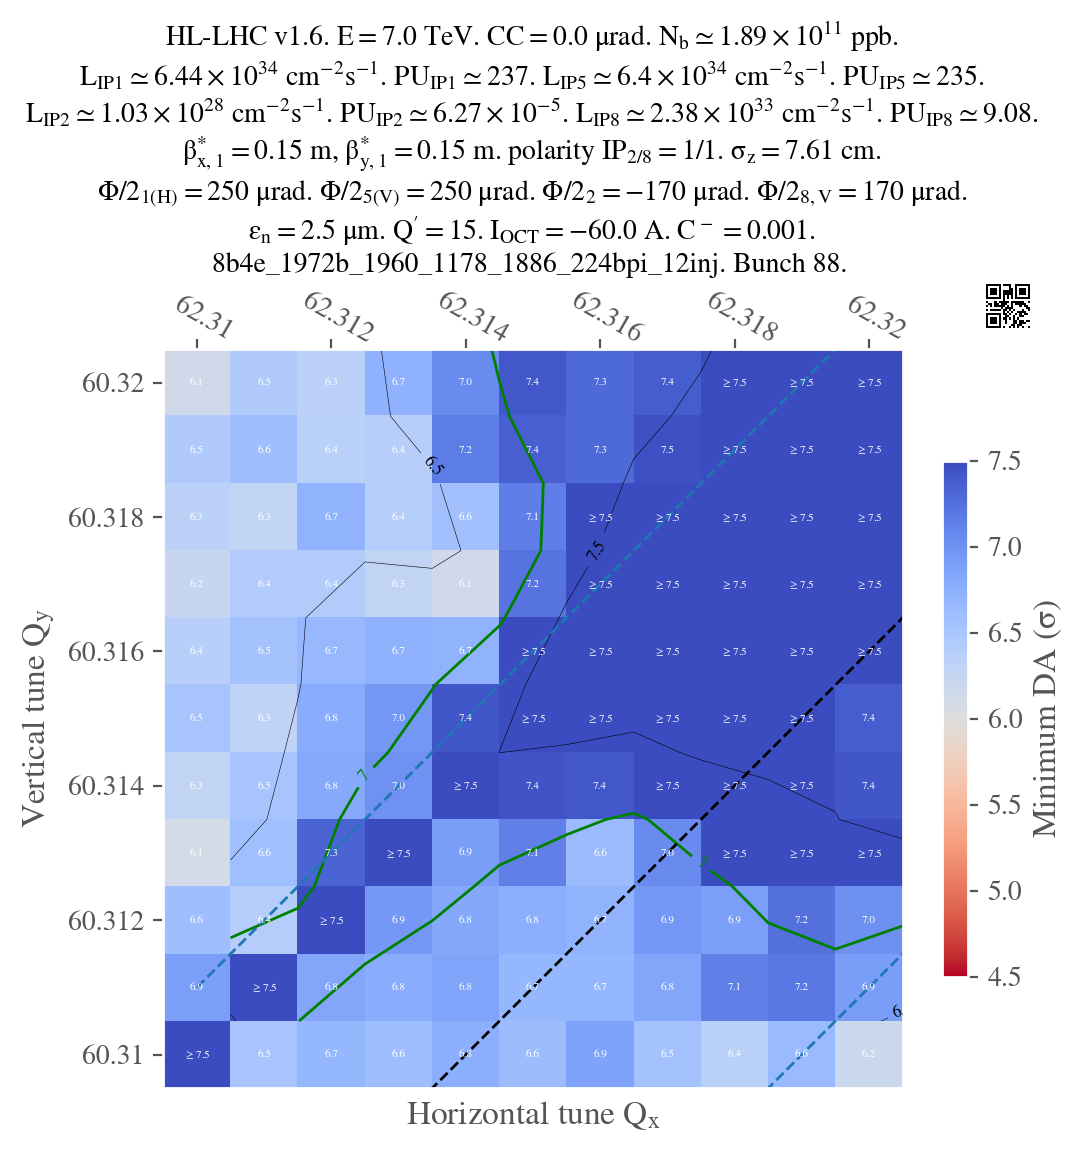

In [4]:
title = get_title_from_configuration(
    df_final,
    betx_value=0.15,
    bety_value=0.15,
    type_crossing="flathv",
    display_LHC_version=True,
    display_energy=True,
    display_bunch_index=True,
    display_CC_crossing=True,
    display_bunch_intensity=True,
    display_beta=True,
    display_crossing_IP_1=True,
    display_crossing_IP_2=True,
    display_crossing_IP_5=True,
    display_crossing_IP_8=True,
    display_bunch_length=True,
    display_polarity_IP_2_8=True,
    display_emittance=True,
    display_chromaticity=True,
    display_octupole_intensity=True,
    display_coupling=True,
    display_filling_scheme=True,
    display_tune=False,
    display_luminosity_1=True,
    display_luminosity_2=True,
    display_luminosity_5=True,
    display_luminosity_8=True,
    display_PU_1=True,
    display_PU_2=True,
    display_PU_5=True,
    display_PU_8=True,
)

fig, ax = plot_heatmap(
    df_final,
    horizontal_variable = "qx_b1",
    vertical_variable="qy_b1",
    color_variable="normalized amplitude in xy-plane",
    link="www.test.com",
    plot_contours=True,
    xlabel=r'Horizontal tune $Q_x$',
    ylabel=r'Vertical tune $Q_y$',
    symmetric_missing=False,
    mask_lower_triangle=False,
    mask_upper_triangle=False,
    title=title,
    vmin=4.5,
    vmax=7.5,
    green_contour = 7.0,
    label_cbar="Minimum DA (" + r"$\sigma$" + ")",
    output_path="output.pdf",
    display_plot=False,
    latex_fonts=True,
    vectorize=False,
    fill_missing_value_with=8,
)